In [99]:
import pandas as pd

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.metrics import accuracy_score

In [103]:
from sklearn.preprocessing import LabelEncoder

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [105]:
from sklearn.tree import export_graphviz

In [106]:
from six import StringIO

In [107]:
from IPython.display import Image 

In [108]:
import pydotplus

In [109]:
dp = pd.read_csv("newinjuryData.csv")

In [110]:
dp = dp.drop(columns=['Unnamed: 0'])

In [111]:
dp.to_csv('data.csv')

In [112]:
col_names = ['Skill Level','Injured Before','Age', 'Gender', 'Activity', 'Injury type']

In [113]:
classTree = pd.read_csv("data.csv", header=None, names=col_names)

In [114]:
classTree = classTree.iloc[1: , :]

In [115]:
labelencoder = LabelEncoder()
classTree.head(60)

,Skill Level,Injured Before,Age,Gender,Activity,Injury type
0.0,professional,no,36-50,F,Hockey,Lower Back Pain
1.0,professional,no,65-80,F,Soccer,Sprains
2.0,Casual,no,18-36,F,Cycling,Lower Back Pain
3.0,amateur,yes,18-36,M,Skateboarding,Plantar Fasciitis
4.0,amateur,yes,50-65,M,Rugby,Lower Back Pain
5.0,professional,no,65-80,F,Weightlifting,Plantar Fasciitis
6.0,amateur,yes,36-50,F,Hockey,Lower Back Pain
7.0,Casual,no,65-80,F,Tennis,Sprains
8.0,amateur,yes,18-36,M,Dancing,Lower Back Pain
9.0,Casual,no,65-80,F,Tennis,Plantar Fasciitis


In [116]:
classTree['Gender'] = labelencoder.fit_transform(classTree['Gender'])

In [117]:
classTree['Skill Level'] = labelencoder.fit_transform(classTree['Skill Level'])

In [118]:
classTree['Injured Before'] = labelencoder.fit_transform(classTree['Injured Before'])

In [119]:
classTree['Activity'] = labelencoder.fit_transform(classTree['Activity'])

In [120]:
classTree['Age'] = labelencoder.fit_transform(classTree['Age'])

In [121]:
classTree['Injury type'] = labelencoder.fit_transform(classTree['Injury type'])

In [122]:
classTree.head(60)

,Skill Level,Injured Before,Age,Gender,Activity,Injury type
0.0,2,0,2,0,4,0
1.0,2,0,4,0,9,3
2.0,0,0,1,0,0,0
3.0,1,1,1,1,8,1
4.0,1,1,3,1,7,0
5.0,2,0,4,0,11,1
6.0,1,1,2,0,4,0
7.0,0,0,4,0,10,3
8.0,1,1,1,1,1,0
9.0,0,0,4,0,10,1


In [123]:
sortedDF = classTree.sort_values('Injury type')

In [124]:
sortedDF.head(50)

,Skill Level,Injured Before,Age,Gender,Activity,Injury type
0.0,2,0,2,0,4,0
4353.0,0,0,0,0,4,0
4354.0,0,0,1,0,8,0
4355.0,0,1,3,1,10,0
4366.0,1,0,3,0,5,0
4376.0,1,0,3,1,3,0
4391.0,2,0,3,1,6,0
4393.0,2,1,1,0,1,0
4398.0,2,1,3,1,1,0
4405.0,1,1,1,0,4,0


In [125]:
feature_cols = ['Skill Level','Injured Before','Age','Gender','Activity']

In [126]:
target_cols = ['Injury type']

In [127]:
X = classTree[feature_cols]

In [128]:
y = classTree[target_cols]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [130]:
clf = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=6,max_features=2,min_samples_leaf=2)#entropy

In [131]:
clf = clf.fit(X_train,y_train)

In [132]:
y_pred = clf.predict(X_train)

In [133]:
print(y_train_pred)

[3 3 3 ... 1 3 2]


In [134]:
#I used this to draw the confusion matrix
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/#:~:text=The%20confusion%20matrix%20is%20a,and%20False%20Negative(FN).

In [135]:
cm = confusion_matrix(y_test, y_pred)

In [136]:
cm_df = pd.DataFrame(cm,
                     index = ['Lower Back Pain','Plantar Fasciitis','Shin Splints','Sprains','Strains'], 
                     columns = ['Lower Back Pain','Plantar Fasciitis','Shin Splints','Sprains','Strains'])

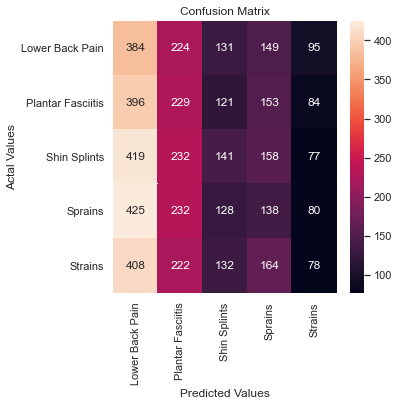

In [137]:
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True,fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [54]:
print('Training accuracy: ',clf.score(X_train,y_train))
print('Test Accuracy: ',clf.score(X_test,y_test))

Training accuracy:  0.2538
Test Accuracy:  0.1942


In [55]:
names = ['Skill Level','Injured Before','Age','Gender','Activity']

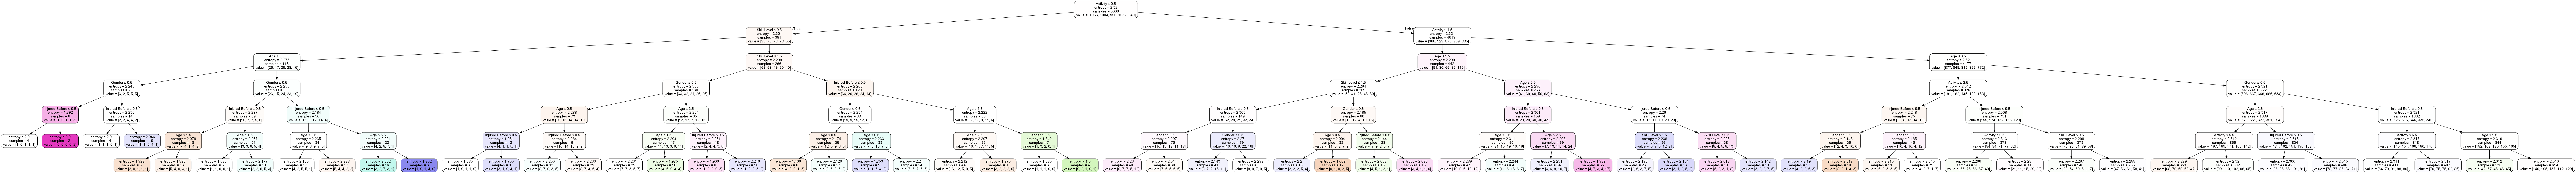

In [56]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('newTree.png')
Image(graph.create_png())

In [220]:
import pickle

In [221]:
with open('decsionTree_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [222]:
with open('decsionTree_model.pkl', 'rb') as f:
    clf_loaded = pickle.load(f)

In [223]:
clf_loaded

DecisionTreeClassifier(criterion='entropy', max_depth=14, max_features=2,
                       min_samples_leaf=2)